In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

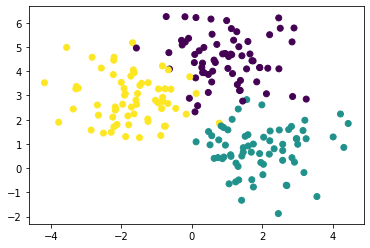

In [15]:
N = 200
C = 3
N_f = 2

X, Y = make_blobs(n_samples = N,
                 centers = C,
                 n_features = N_f,
                 random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.32, random_state = 64)
plt.scatter(X[ : , 0], X[ : , 1], c = Y);

## AdaBoost

In [37]:
class AdaBoost():
    def __init__(self,
                n_estimators = 10,
                estimators_type = "decision_tree",
                max_depth = 1
                ):
        self.n_estimators = n_estimators
        self.estimators_type = estimators_type
        self.max_depth = max_depth
        self.alphas = None
        self.K = None
        
        if self.estimators_type == "decision_tree":
            self.models = [DecisionTreeClassifier(max_depth = self.max_depth) for i in range(self.n_estimators)]
        else:
            raise NotImplementedError
        
    def fit(self, X, Y):
        sample_weights = np.ones_like(Y) * (1 / X.shape[0])
        errors = []
        self.K = np.unique(Y)
        
        for i, estimator in enumerate(self.models):
            
            #a
            estimator.fit(X, Y, sample_weight = sample_weights)
            Y_pred = estimator.predict(X)
            wrong_preds = np.where(Y_pred != Y)[0]
            
            #b
            error = np.sum(sample_weights[wrong_preds]) / np.sum(sample_weights)
            
            if error == 1:
                error -= 0.00001
            elif error == 0:
                error += 0.00001
                
            errors.append(error)
            
            #c
            alpha = np.log((1 - error) / error) + np.log(len(self.K) - 1)
            self.alphas.append(alpha)
            
            #d    
            sample_weights[wrong_preds] *= np.exp(alpha)
            
            #e
            sample_weights = sample_weights / np.sum(sample_weights)
            
    def predict_sample(self, X):
        preds = []
        class_preds = np.zeros(len(self.K))
        for estimator in self.models:
            pred = estimator.predict(X)
            preds.append(pred)
            
            for k in self.K:
                if pred == K:
                    class_preds[k] += self.alphas[i]
        return np.argmax(class_preds)
    
    def predict(self, X):
        return np.array([self.predict_sample(x.reshape(1, -1)) for x in X])

In [38]:
model = AdaBoost()
model.fit(X_train, Y_train)
model.predict(X_test)

AttributeError: 'NoneType' object has no attribute 'append'